In [6]:
import os
import numpy as np
from bionlp.util import io, func, plot

%matplotlib inline

In [7]:
DATA_PATH = '../../data/bioevent/bnlpst/bgi2011/ent-cv'
# fig_caches = ['ent%i/roc.npz'%i for i in range(11)]
fig_caches = ['ent%i/prc.npz'%i for i in range(11)]
lb_prefix = ['Action', 'Agent', 'Entity', 'Gene', 'Member', 'Promoter', 'Protein', 'Regulon', 'Site', 'Target', 'Transcription']

# DATA_PATH = '../../data/bioevent/bnlpst/bgi2011/evnt-cv'
# fig_caches = ['%i/roc.npz'%i for i in range(10)]
# # fig_caches = ['%i/prc.npz'%i for i in range(10)]
# lb_prefix = ['ActionTarget', 'BindTo', 'Interaction', 'PromoterDependence', 'PromoterOf', 'RegulonDependence', 'RegulonMember', 'SiteOf', 'TranscriptionBy', 'TranscriptionFrom']

# DATA_PATH = '../../data/bioevent/bnlpst/bb2016/ent-cv'
# fig_caches = ['ent%i/roc.npz'%i for i in range(2)]
# # fig_caches = ['ent%i/prc.npz'%i for i in range(2)]
# lb_prefix = ['Bacteria','Location']
# fig_cache_paths = [os.path.join(DATA_PATH, fc) for fc in fig_caches]

# DATA_PATH = '../../data/bioevent/bnlpst/bb2016/evnt-cv'
# fig_caches = ['%i/roc.npz'%i for i in range(1)]
# # fig_caches = ['%i/prc.npz'%i for i in range(1)]
# lb_prefix += ['Lives_In']
# fig_cache_paths += [os.path.join(DATA_PATH, fc) for fc in fig_caches]

fig_cache_paths = [os.path.join(DATA_PATH, fc) for fc in fig_caches]

plot.MON = True
proc_label = True

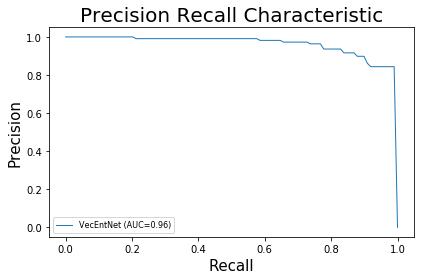

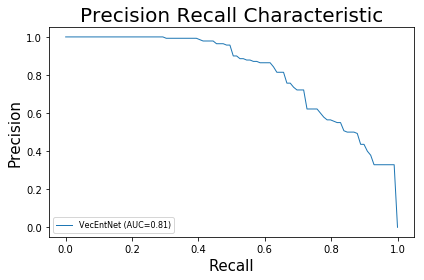

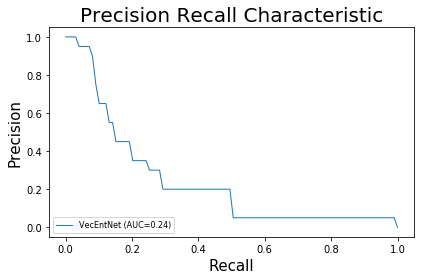

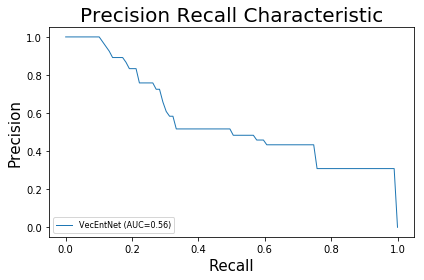

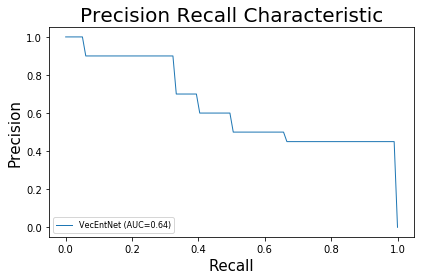

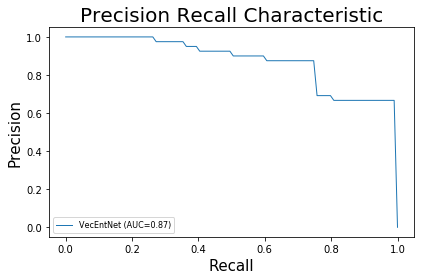

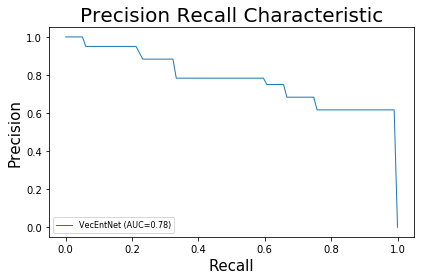

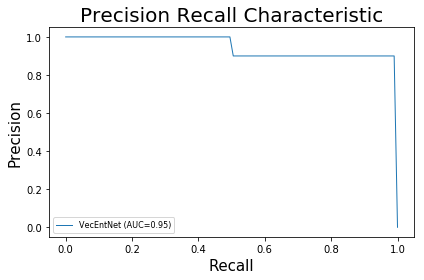

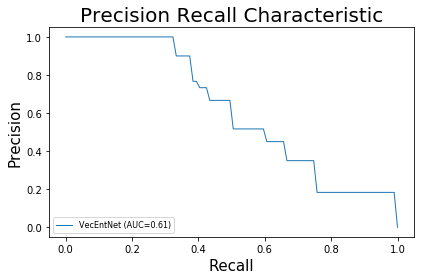

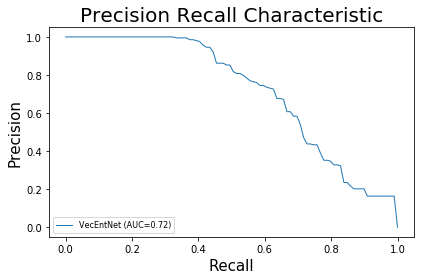

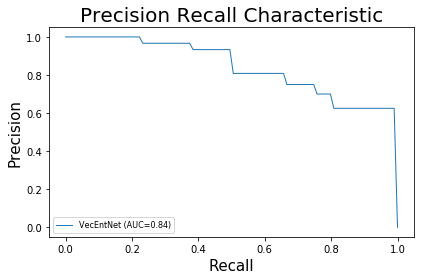

In [8]:
# Extract data
merged_data = {}
for fpath in fig_cache_paths:
    fig_file = io.read_npz(fpath)
    plot.plot_data(fig_file)
    for k, v in fig_file.iteritems():
        merged_data.setdefault(k, []).append(v)

In [9]:
# Process the group information
if (merged_data.has_key('groups') and all([x.item() is not None for x in merged_data['groups']])):
    num_data = [x.shape[0] for x in merged_data['data']]
    cumnum = np.cumsum(num_data)
    for i in range(1, len(merged_data['groups'])):
        merged_data['groups'][i] += cumnum[i-1]

# Process the labels
if (merged_data.has_key('labels') and proc_label):
    for prfx, i in zip(lb_prefix, range(len(merged_data['labels']))):
        merged_data['labels'][i] = np.array([prfx+'-'+lb for lb in merged_data['labels'][i]])

# Merge the parameters
for k, v in merged_data.iteritems():
    if (v[0].shape):
        merged_data[k] = np.concatenate(v)
    else:
        merged_data[k] = v[0]

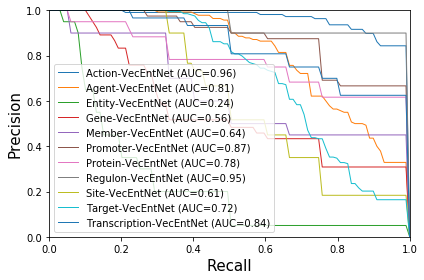

In [10]:
nomargin_box = dict(xlim=[0,1], ylim=[0,1])
roc_zoomin_box = dict(xlim=[0,0.4], ylim=[0,1])
prc_zoomin_box = dict(xlim=[0.4,1], ylim=[0,1])
plot.plot_data(merged_data, title='', fmt='pdf', plot_cfg=func.update_dict(dict(legend_fontsize=10, cmap='jet'), nomargin_box))